.# Objetivos deste trabalho:
- Se familiarizar com o ambiente Notebook e com Python
- Implementar um perceptron simples, treiná-lo no conjunto de TREINO do CIFAR-10 e avaliá-lo no conjunto de TESTE (alvo: distinguir fotos de animais de meios de transporte)
- Utilizar a função sigmóide e verificar seu efeito no treinamento e na avaliação
- Modificar a metodologia para classificar cada classe individualmente (i.e. treinar 10 perceptrons, um para cada classe). Considerar: dado um exemplo, que passará por cada perceptron, como decidir qual é a classe dele?

Dúvidas:

1 - Usar saida da sigmoid ou saida direta no calculo de erro?
2 - Qual função de erro utilizar?

In [1]:
%matplotlib inline

import torch
import torchvision
import numpy as np

np.seterr(all='raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
# Carregar os datasets

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)

dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
print(len(dataset_train), len(dataset_test))

50000 10000


In [5]:
# Converter para tons de cinza

# Treino
grayscale_dataset_train = []
for img,label in dataset_train:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_train.append((gray_npimg,category))
    
# Teste
grayscale_dataset_test = []
for img,label in dataset_test:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_test.append((gray_npimg,category))    

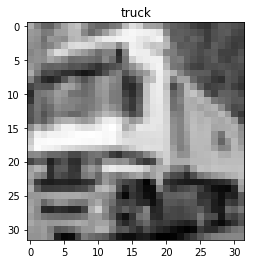

In [6]:
# Mostrar uma imagem

import matplotlib.pyplot as plt
import numpy as np

image_index = 1
label = grayscale_dataset_train[image_index][1]
npimg = grayscale_dataset_train[image_index][0]

plt.imshow(npimg, cmap='gray')
plt.title(label)
plt.show()

In [7]:
# Converter para vetores 1D

# Para pensar: por que a divisão por 255 no código abaixo?

# A divisão por 255 (maior valor possível que cada pixel em tom de cinza alcança)
# ocorre para "normalizar os valores". Valores muito altos poderiam causar problemas
# à rede, ou até erros de overflow  nas iterações iniciais, além de exigir que os pesos
# dos perceptrons sejam extremamente precisos em pequena escala, podendo impedir a
# melhoria do modelo por falta de capacidade de representação

linear_dataset_train = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train.append((linear_img,label))
    
linear_dataset_test = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test.append((linear_img,label))   
    


In [8]:
size = len(linear_dataset_train[0][0])
print(size)

1024


# Definindo o perceptron

In [9]:
def degrau(x, threshold):
    if x > threshold:
        return 1
    return 0

def sigmoid(x):
    return 1/(1+np.exp(-x))

def perceptron(inputs, weights):
    o = inputs.dot(weights)
    y = sigmoid(o)
    return (o, y)

# Treinando o perceptron

In [10]:
def evaluate(weights, dataset):
    # Defina a métrica de avaliação do perceptron aqui (e.g. acurácia)
    acc = 0
    for img,label in dataset:
        inputs = np.append(img, [1])
        o, y = perceptron(inputs.reshape(-1, ), weights.reshape(-1, ))
        # Utiliza dunção degrau para obter 0 ou 1 e avaliar o acerto ou erro da classe
        # definido threshold de 0.5, dividindo ao meio os valores da sigmoid
        y = degrau(y, 0.5)
        if y == label:
            acc += 1
    
    return (acc, len(dataset))

def error(target, pred):
    return 

In [13]:
# Inicialização
weights = (np.random.rand(1,size) - 0.5)[0]
bias = (np.random.rand(1) - 0.5) 
weights = np.append(weights, bias) 

neta = 0.001
np.random.shuffle(linear_dataset_train)

# Implemente o treino aqui (para separar as duas classes definidas)
accuracies = []

acc, data_len = evaluate(weights, linear_dataset_train)
accuracies.append(acc)
print("Initial accuracy: " + str(100*acc/data_len) + "%")
    
for epoch in range(100):
    for img, label in linear_dataset_train:
        inputs = np.append(img, [1])
        o, y = perceptron(inputs.reshape(-1, ), weights.reshape(-1, ))
        weights += neta * (label - y) * inputs #* (1 - inputs)
    acc, data_len = evaluate(weights, linear_dataset_train)
    accuracies.append(acc)
    print("Accuracy at epoch " + str(epoch) + ": " + str(100*acc/data_len) + "%")
    

Initial accuracy: 46.912%
Accuracy at epoch 0: 68.468%
Accuracy at epoch 1: 69.848%
Accuracy at epoch 2: 70.484%
Accuracy at epoch 3: 70.932%
Accuracy at epoch 4: 71.194%
Accuracy at epoch 5: 71.356%
Accuracy at epoch 6: 71.46%
Accuracy at epoch 7: 71.524%
Accuracy at epoch 8: 71.594%
Accuracy at epoch 9: 71.696%
Accuracy at epoch 10: 71.754%
Accuracy at epoch 11: 71.826%
Accuracy at epoch 12: 71.884%
Accuracy at epoch 13: 71.952%
Accuracy at epoch 14: 71.986%
Accuracy at epoch 15: 72.048%
Accuracy at epoch 16: 72.08%
Accuracy at epoch 17: 72.084%
Accuracy at epoch 18: 72.13%
Accuracy at epoch 19: 72.17%
Accuracy at epoch 20: 72.19%
Accuracy at epoch 21: 72.21%
Accuracy at epoch 22: 72.228%
Accuracy at epoch 23: 72.252%
Accuracy at epoch 24: 72.288%
Accuracy at epoch 25: 72.32%
Accuracy at epoch 26: 72.32%
Accuracy at epoch 27: 72.328%
Accuracy at epoch 28: 72.352%
Accuracy at epoch 29: 72.376%
Accuracy at epoch 30: 72.376%
Accuracy at epoch 31: 72.364%
Accuracy at epoch 32: 72.38%
Acc

In [14]:
# Avalie o modelo treinado aqui
# Como a acurácia no conjunto de teste se compara com a acurácia obtida no conjunto de treino?
acc, data_len = evaluate(weights, linear_dataset_train)
print("Acurácia no conjunto de treino:", acc / data_len)

acc, data_len = evaluate(weights, linear_dataset_test)
print("Acurácia no conjunto de teste:", acc / data_len)



Acurácia no conjunto de treino: 0.72706
Acurácia no conjunto de teste: 0.7117


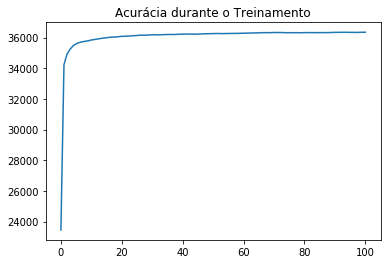

In [15]:
# Caso queiram plotar alguma coisa

import matplotlib.pyplot as plt
plt.title("Acurácia durante o Treinamento")
_ = plt.plot(accuracies)

# Classificando classes individuais

Implemente aqui a modificação do processo de avaliação e treinamento para poder classificar cada classe individualmente.

- Ideia geral: treinar um perceptron por classe (exemplo positivo = exemplos da classe; exemplos negativos = exemplo de todas outras classes)
- Dado um exemplo qualquer, como decidir qual perceptron está dando a classe correta?

In [16]:
def define_labels(dataset_train, dataset_test, target_labels):
    target_labels = set(target_labels)
    
    linear_dataset_train = []
    for img, category in dataset_train:
        linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
        if category in target_labels:
            label = 1
        else:
            label = 0
        linear_dataset_train.append((linear_img,label))

    linear_dataset_test = []
    for img, category in dataset_test:
        linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
        if category in target_labels:
            label = 1
        else:
            label = 0
        linear_dataset_test.append((linear_img,label))  
        
    return linear_dataset_train, linear_dataset_test

# Treinamento e Avaliação de Múltiplas Classes Individuais

In [18]:
perceptron_weights = []
for target_label in classes:
    train, test = define_labels(grayscale_dataset_train, grayscale_dataset_test, [target_label])
    weights = (np.random.rand(1,size) - 0.5)[0]
    bias = (np.random.rand(1) - 0.5) 
    weights = np.append(weights, bias) 
    neta = 0.001
    
    accuracies = []
    for epoch in range(100):
        for img, label in train:
            inputs = np.append(img, [1])
            o, y = perceptron(inputs.reshape(-1, ), weights.reshape(-1, ))
            weights += neta * (label - y) * inputs #* (1 - inputs)

        acc, data_len = evaluate(weights, linear_dataset_train)
        accuracies.append(acc)
        print("Acurácia para label " + target_label + " na época " + str(epoch) + ": " + str(100 * acc / data_len) + "%")
    
    perceptron_weights.append({
        'weights': weights,
        'label': target_label
    })
    print("Acurácia final:")
    acc, data_len = evaluate(weights, linear_dataset_train)
    print("No conjunto de treino:", acc / data_len)
    acc, data_len = evaluate(weights, linear_dataset_test)
    print("No conjunto de teste:", acc / data_len)
    print('\n\n')

Acurácia para label plane na época 0: 59.816%
Acurácia para label plane na época 1: 59.93%
Acurácia para label plane na época 2: 59.964%
Acurácia para label plane na época 3: 59.988%
Acurácia para label plane na época 4: 60.004%
Acurácia para label plane na época 5: 60.002%
Acurácia para label plane na época 6: 60.006%
Acurácia para label plane na época 7: 60.006%
Acurácia para label plane na época 8: 60.016%
Acurácia para label plane na época 9: 60.024%
Acurácia para label plane na época 10: 60.026%
Acurácia para label plane na época 11: 60.028%
Acurácia para label plane na época 12: 60.03%
Acurácia para label plane na época 13: 60.034%
Acurácia para label plane na época 14: 60.034%
Acurácia para label plane na época 15: 60.04%
Acurácia para label plane na época 16: 60.042%
Acurácia para label plane na época 17: 60.042%
Acurácia para label plane na época 18: 60.042%
Acurácia para label plane na época 19: 60.038%
Acurácia para label plane na época 20: 60.038%
Acurácia para label plane 

Acurácia para label car na época 78: 64.17%
Acurácia para label car na época 79: 64.164%
Acurácia para label car na época 80: 64.166%
Acurácia para label car na época 81: 64.152%
Acurácia para label car na época 82: 64.152%
Acurácia para label car na época 83: 64.152%
Acurácia para label car na época 84: 64.15%
Acurácia para label car na época 85: 64.154%
Acurácia para label car na época 86: 64.152%
Acurácia para label car na época 87: 64.15%
Acurácia para label car na época 88: 64.148%
Acurácia para label car na época 89: 64.15%
Acurácia para label car na época 90: 64.156%
Acurácia para label car na época 91: 64.156%
Acurácia para label car na época 92: 64.154%
Acurácia para label car na época 93: 64.148%
Acurácia para label car na época 94: 64.146%
Acurácia para label car na época 95: 64.14%
Acurácia para label car na época 96: 64.148%
Acurácia para label car na época 97: 64.146%
Acurácia para label car na época 98: 64.144%
Acurácia para label car na época 99: 64.144%
Acurácia final:

Acurácia para label cat na época 56: 59.942%
Acurácia para label cat na época 57: 59.942%
Acurácia para label cat na época 58: 59.942%
Acurácia para label cat na época 59: 59.942%
Acurácia para label cat na época 60: 59.94%
Acurácia para label cat na época 61: 59.94%
Acurácia para label cat na época 62: 59.94%
Acurácia para label cat na época 63: 59.94%
Acurácia para label cat na época 64: 59.94%
Acurácia para label cat na época 65: 59.938%
Acurácia para label cat na época 66: 59.94%
Acurácia para label cat na época 67: 59.94%
Acurácia para label cat na época 68: 59.938%
Acurácia para label cat na época 69: 59.938%
Acurácia para label cat na época 70: 59.938%
Acurácia para label cat na época 71: 59.938%
Acurácia para label cat na época 72: 59.938%
Acurácia para label cat na época 73: 59.938%
Acurácia para label cat na época 74: 59.938%
Acurácia para label cat na época 75: 59.938%
Acurácia para label cat na época 76: 59.936%
Acurácia para label cat na época 77: 59.936%
Acurácia para lab

Acurácia para label dog na época 34: 59.714%
Acurácia para label dog na época 35: 59.716%
Acurácia para label dog na época 36: 59.716%
Acurácia para label dog na época 37: 59.716%
Acurácia para label dog na época 38: 59.716%
Acurácia para label dog na época 39: 59.716%
Acurácia para label dog na época 40: 59.716%
Acurácia para label dog na época 41: 59.716%
Acurácia para label dog na época 42: 59.716%
Acurácia para label dog na época 43: 59.714%
Acurácia para label dog na época 44: 59.714%
Acurácia para label dog na época 45: 59.712%
Acurácia para label dog na época 46: 59.712%
Acurácia para label dog na época 47: 59.716%
Acurácia para label dog na época 48: 59.718%
Acurácia para label dog na época 49: 59.718%
Acurácia para label dog na época 50: 59.718%
Acurácia para label dog na época 51: 59.718%
Acurácia para label dog na época 52: 59.718%
Acurácia para label dog na época 53: 59.72%
Acurácia para label dog na época 54: 59.722%
Acurácia para label dog na época 55: 59.724%
Acurácia pa

Acurácia para label horse na época 12: 59.626%
Acurácia para label horse na época 13: 59.616%
Acurácia para label horse na época 14: 59.61%
Acurácia para label horse na época 15: 59.614%
Acurácia para label horse na época 16: 59.61%
Acurácia para label horse na época 17: 59.606%
Acurácia para label horse na época 18: 59.616%
Acurácia para label horse na época 19: 59.612%
Acurácia para label horse na época 20: 59.61%
Acurácia para label horse na época 21: 59.598%
Acurácia para label horse na época 22: 59.594%
Acurácia para label horse na época 23: 59.592%
Acurácia para label horse na época 24: 59.588%
Acurácia para label horse na época 25: 59.58%
Acurácia para label horse na época 26: 59.574%
Acurácia para label horse na época 27: 59.576%
Acurácia para label horse na época 28: 59.574%
Acurácia para label horse na época 29: 59.576%
Acurácia para label horse na época 30: 59.576%
Acurácia para label horse na época 31: 59.57%
Acurácia para label horse na época 32: 59.566%
Acurácia para labe

Acurácia para label ship na época 88: 60.662%
Acurácia para label ship na época 89: 60.664%
Acurácia para label ship na época 90: 60.666%
Acurácia para label ship na época 91: 60.664%
Acurácia para label ship na época 92: 60.664%
Acurácia para label ship na época 93: 60.668%
Acurácia para label ship na época 94: 60.666%
Acurácia para label ship na época 95: 60.664%
Acurácia para label ship na época 96: 60.662%
Acurácia para label ship na época 97: 60.662%
Acurácia para label ship na época 98: 60.662%
Acurácia para label ship na época 99: 60.66%
Acurácia final:
No conjunto de treino: 0.6066
No conjunto de teste: 0.6084



Acurácia para label truck na época 0: 62.072%
Acurácia para label truck na época 1: 62.044%
Acurácia para label truck na época 2: 61.968%
Acurácia para label truck na época 3: 61.906%
Acurácia para label truck na época 4: 61.832%
Acurácia para label truck na época 5: 61.812%
Acurácia para label truck na época 6: 61.8%
Acurácia para label truck na época 7: 61.796%
Acurá

# Criando um "Classificador Universal"

In [22]:
from pprint import pprint
pprint("Shape de um perceptron Individual")
pprint(perceptron_weights[0])

'Shape de um perceptron Individual'
{'label': 'plane',
 'weights': array([ 0.15492635,  0.10552881, -0.42166679, ...,  0.03577413,
       -0.15992676, -4.81919716])}


In [154]:
def classificador(perceptrons, img):
    scores = []
    for p in perceptrons:
        weights = p['weights']
        label = p['label']
        
        inputs = np.append(img, [1])
        o, y = perceptron(inputs.reshape(-1, ), weights.reshape(-1, ))
        scores.append((y, label))

    return sorted(scores, reverse=True)

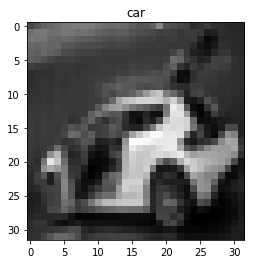

In [166]:
image_index = 6
label = grayscale_dataset_test[image_index][1]
npimg = grayscale_dataset_test[image_index][0]

plt.imshow(npimg, cmap='gray')
plt.title(label)
plt.show()

In [167]:
img = grayscale_dataset_test[image_index][0]
linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255

classificador(perceptron_weights, linear_img)

[(0.2512650315506589, 'frog'),
 (0.1399444453454282, 'cat'),
 (0.09622811000565898, 'dog'),
 (0.08400663065261649, 'ship'),
 (0.0821470331537975, 'bird'),
 (0.08022946792648254, 'horse'),
 (0.06919187954232493, 'deer'),
 (0.056338188007025544, 'plane'),
 (0.040733556685907474, 'car'),
 (0.02474235454360693, 'truck')]